In [1]:
import pandas as pd

In [2]:
import os 
filepath = os.path.join(os.getcwd(), 'Dados', 'dataset_tratado.csv')

In [3]:
# Cria o DataFrame completo, com todos os dados do arquivo dataset_grad_pres.csv

df_completo = pd.read_csv(filepath, engine='python', header=0, sep = ",")

In [4]:
df_completo.head(10)

,ANO_INGRESSO,SEMESTRE_INGRESSO,TIPO_INGRESSO,COTA,CURSO_NOME,AREA,SITUACAO,MOTIVO_SAIDA,CAMPUS,TURNO,...,LAT,LOCAL,LNG_ORGM,LAT_ORGM,LOCAL_ORGM,BAIXA_RENDA,ESCOLA_PUBLICA,ETNIA_PPI,PCD,ESTADO
0,2008,1,Transferência Obrigatória,NaN,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,...,-21.753129,"VALE DO IPE, JUIZ DE FORA, MG, BRASIL",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,1,VESTIBULAR,Grupo B,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,...,-21.804313,"PARQUE JARDIM DA SERRA, JUIZ DE FORA, MG, BRASIL",NaN,NaN,NaN,Sim,Sim,Não,Não,NaN
2,2008,1,PISM,Grupo C,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,Abandono,JUIZ DE FORA,INTEGRAL,...,-21.750069,"SANTA CATARINA, JUIZ DE FORA, MG, BRASIL",NaN,NaN,NaN,Não,Não,Não,Não,NaN
3,2008,1,VESTIBULAR,Grupo C,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Concluido,Conclusão,JUIZ DE FORA,INTEGRAL,...,-21.718564,"ANDRELANDIA, MG, BRASIL",NaN,NaN,NaN,Não,Não,Não,Não,NaN
4,2008,1,VESTIBULAR,Grupo B,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,...,-20.850899,"PAULA CANDIDO, MG, BRASIL",NaN,NaN,NaN,Sim,Sim,Não,Não,NaN
5,2008,1,CV/Nova Modalidade/Habilitação,NaN,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,Abandono/2ª Mod/Hab,JUIZ DE FORA,INTEGRAL,...,-21.762424,"CENTRO, JUIZ DE FORA, MG, BRASIL",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2008,1,PISM,Grupo C,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,Mudança de Curso,JUIZ DE FORA,INTEGRAL,...,-25.424429,"CURITIBA, PR, BRASIL",NaN,NaN,NaN,Não,Não,Não,Não,NaN
7,2008,1,VESTIBULAR,Grupo B,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,...,-20.754870,"VICOSA, MG, BRASIL",NaN,NaN,NaN,Sim,Sim,Não,Não,NaN
8,2008,1,PISM,Grupo C,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,...,-21.745732,"MARIANO PROCOPIO, JUIZ DE FORA, MG, BRASIL",NaN,NaN,NaN,Não,Não,Não,Não,NaN
9,2008,1,VESTIBULAR,Grupo C,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,...,-21.762424,"CENTRO, JUIZ DE FORA, MG, BRASIL",NaN,NaN,NaN,Não,Não,Não,Não,NaN


In [5]:
########################### TABELA ##################
# Grupo / Baixa renda / Escola Pública /  Etnia-PPI / PCD
# Grupo A sim sim sim não
# Grupo A1 sim sim sim sim
# Grupo B sim sim não não
# Grupo B1 sim sim não sim
# Grupo C não não não não
# Grupo D não sim sim não
# Grupo D1 não sim  sim sim
# Grupo E não sim não não
# Grupo E1 não sim não sim

In [6]:
# Inclui no final do DataFrame df_completo as colunas:
# Baixa renda; Escola pública; Etnia; PPI; PCD
# e preenche seus valores com "Sim" ou "Não", de acordo com a tabela acima

def classificar_baixa_renda(cota):
    baixa_renda_categorias = ["Grupo A", "Grupo A1", "Grupo B", "Grupo B1"]

    if cota in baixa_renda_categorias:
        return "Sim"
    else:
        return "Não"

df_completo['Baixa renda'] = df_completo['COTA'].apply(classificar_baixa_renda)

def classificar_escola_publica(cota):
    escola_publica_categorias = ["Grupo A", "Grupo A1", "Grupo B", "Grupo B1", "Grupo D", "Grupo D1", "Grupo E", "Grupo E1"]

    if cota in escola_publica_categorias:
        return "Sim"
    else:
        return "Não"

df_completo['Escola pública'] = df_completo['COTA'].apply(classificar_escola_publica)

def classificar_etnia_PPI(cota):
    etnia_ppi_categorias = ["Grupo A", "Grupo A1", "Grupo D", "Grupo D1"]

    if cota in etnia_ppi_categorias:
        return "Sim"
    else:
        return "Não"

df_completo['Etnia PPI'] = df_completo['COTA'].apply(classificar_etnia_PPI)

def classificar_PCD(cota):
    pcd_categorias = ["Grupo A1", "Grupo B1", "Grupo D1", "Grupo E1"]

    if cota in pcd_categorias:
        return "Sim"
    else:
        return "Não"

df_completo['PCD'] = df_completo['COTA'].apply(classificar_PCD)

In [7]:
# Para visualizar os 5 primeiros registros do DataFrame completo, retire o # do início da linha abaixo

#df_completo.head()

In [8]:
# DataFrame somente com alunos que ingressaram de 2013 em diante

df_ingressantes_apos_2012 = df_completo.loc[(df_completo['ANO_INGRESSO'] > 2012)]

In [9]:
# Para visualizar os 5 primeiros registros do DataFrame somente com alunos que ingressaram de 2013 em diante, retire o # do início da linha abaixo

#df_ingressantes_apos_2012.head()

In [10]:
# Mantém no DataFrame df_ingressantes_apos_2012 apenas os alunos que ingressaram por SiSU ou PISM

df_ingressantes_apos_2012 = df_ingressantes_apos_2012.loc[(df_ingressantes_apos_2012['TIPO_INGRESSO'] == 'SiSU') 
            | (df_ingressantes_apos_2012['TIPO_INGRESSO'] == 'PISM') 
            | (df_ingressantes_apos_2012['TIPO_INGRESSO'] == 'SiSU VAGA OCIOSA')
            | (df_ingressantes_apos_2012['TIPO_INGRESSO'] == 'PISM VAGA OCIOSA')]

In [11]:
# Retira do DataFrame df_ingressantes_apos_2012 os cursos que contêm "ABI -" no nome
# REGISTRAR AQUI POR QUE RESOLVEMOS ELIMINAR ESSES REGISTROS

df_ingressantes_apos_2012 = df_ingressantes_apos_2012[~df_ingressantes_apos_2012['CURSO_NOME'].str.contains("ABI -", regex=False)]

In [12]:
# Retira do DataFrame df_ingressantes_apos_2012 os cursos que contêm "OPÇÃO 2º CICLO CIÊNCIAS EXATAS" no nome
# REGISTRAR AQUI POR QUE RESOLVEMOS ELIMINAR ESSES REGISTROS

df_ingressantes_apos_2012 = df_ingressantes_apos_2012[~df_ingressantes_apos_2012['CURSO_NOME'].str.contains("OPÇÃO 2º CICLO CIÊNCIAS EXATAS", regex=False)]

In [13]:
# Retira do DataFrame df_ingressantes_apos_2012 os cursos que contêm "BACHARELADO INTERDISCIPLINAR" no nome
# REGISTRAR AQUI POR QUE RESOLVEMOS ELIMINAR ESSES REGISTROS

df_ingressantes_apos_2012 = df_ingressantes_apos_2012[~df_ingressantes_apos_2012['CURSO_NOME'].str.contains("BACHARELADO INTERDISCIPLINAR", regex=False)]

In [14]:
# Retira do DataFrame df_ingressantes_apos_2012 os cursos que contêm "CIÊNCIAS EXATAS" no nome
# REGISTRAR AQUI POR QUE RESOLVEMOS ELIMINAR ESSES REGISTROS

df_ingressantes_apos_2012 = df_ingressantes_apos_2012[~df_ingressantes_apos_2012['CURSO_NOME'].str.contains("CIÊNCIAS EXATAS", regex=False)]

In [15]:
# DataFrame de alunos evadidos de 2013 em diante
df_evadidos = df_ingressantes_apos_2012.loc[df_ingressantes_apos_2012['SITUACAO'] == 'Evadido']

# Quantidade de evadidos por curso
qtt_evadidos_por_curso = df_evadidos['CURSO_NOME'].value_counts()

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

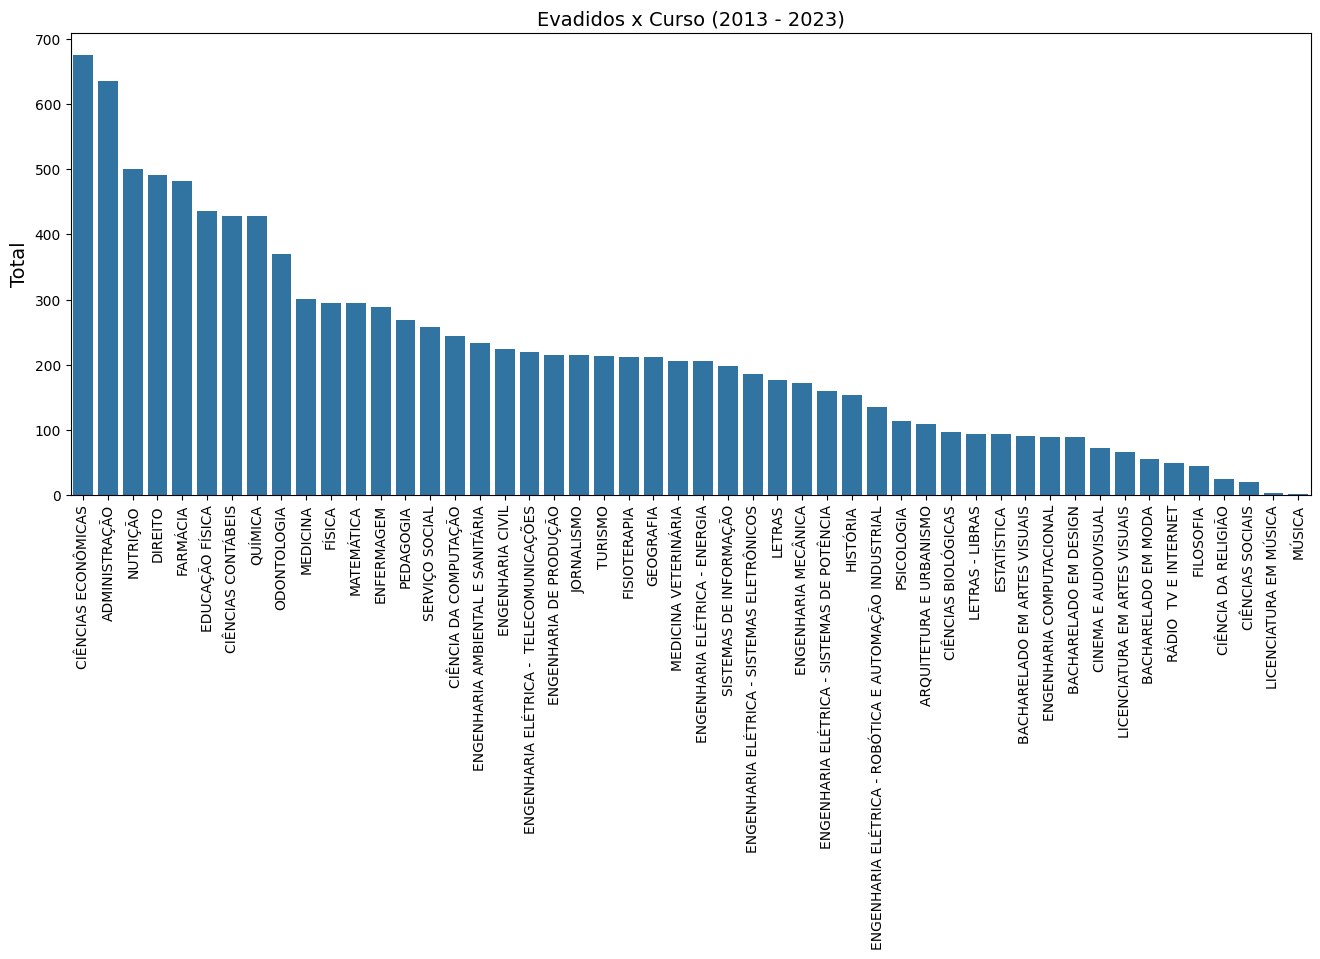

In [17]:
f, axes = plt.subplots(1, 1,  figsize=(16, 6))

g = sns.barplot(x=qtt_evadidos_por_curso.index, 
                y=qtt_evadidos_por_curso)

axes.set_title('Evadidos x Curso (2013 - 2023)', fontsize=14)
axes.set_ylabel('Total', fontsize=14)
axes.set(xlabel='') 

plt.xticks(rotation=90)

plt.show()

In [18]:
def calcular_qtt_situacao(df_ingressantes_apos_2012, filtro, situacao):
    df = df_ingressantes_apos_2012.loc[df_ingressantes_apos_2012['SITUACAO'] == situacao]
    return df.groupby('CURSO_NOME')[filtro].value_counts()

In [19]:
# EXPLICAR O QUE A FUNÇÃO ABAIXO FAZ 

def evadido_vs_ingressante_por_filtro(df_ingressantes, filtro):
    #calcular uma série com o número de alunos, evadidos, número de concluídos e número de ativos
    qtt_filtro_por_curso = df_ingressantes.groupby('CURSO_NOME')[filtro].value_counts()
    qtt_evadidos_por_filtro = calcular_qtt_situacao(df_ingressantes, filtro, 'Evadido')
    qtt_concluidos_por_filtro =  calcular_qtt_situacao(df_ingressantes, filtro, 'Concluido')
    qtt_ativos_por_filtro =  calcular_qtt_situacao(df_ingressantes, filtro, 'Ativo')
    
    #cruzamento das Series criadas anterioresmente    
    df = pd.merge(qtt_filtro_por_curso, qtt_evadidos_por_filtro, 
                                      how='left', on=['CURSO_NOME', filtro], suffixes=('_total', '_evadidos')).fillna(0)
    df = pd.merge(df, qtt_concluidos_por_filtro, 
                                      how='left', on=['CURSO_NOME', filtro], suffixes=('', '_concluintes')).fillna(0)
    df = pd.merge(df, qtt_ativos_por_filtro, 
                                      how='left', on=['CURSO_NOME', filtro], suffixes=('', '_ativos')).fillna(0)
    df = df.rename(columns={'count': 'count_concluintes'}).sort_values(filtro)

    #calculando os percentuais
    df['pct_evasao'] = df['count_evadidos']/df['count_total']
    df['pct_concluido'] = df['count_concluintes']/df['count_total']
    df['pct_ativo'] = df['count_ativos']/df['count_total']
   
    return df

In [20]:
# EXPLICAR O QUE A FUNÇÃO FAZ 

def cota_por_curso(evadido_vs_ingressante, curso):
    
    ax = evadido_vs_ingressante[['count_evadidos', 'count_concluintes', 'count_ativos']].loc[curso].plot(kind='bar', stacked=True, figsize=[10,6])
    
    df = evadido_vs_ingressante.loc[curso]
    
    for i, eixo_x in enumerate(ax.get_xticklabels()):
        
        linha = int(eixo_x.get_text()) if eixo_x.get_text().isdigit() else eixo_x.get_text()
        
        pct_evasao_float = df['pct_evasao'].loc[linha]
        pct_evasao_str = f"{pct_evasao_float:.2%}"
        altura_y_evadidos = df['count_evadidos'].loc[linha]
        
        pct_concluintes_float = df['pct_concluido'].loc[linha]
        pct_concluintes_str = f"{pct_concluintes_float:.2%}"
        altura_y_concluintes = df['count_concluintes'].loc[linha]
        
        pct_ativos_float = df['pct_ativo'].loc[linha]
        pct_ativos_str = f"{pct_ativos_float:.2%}"
        altura_y_ativos = df['count_ativos'].loc[linha]
        
        if pct_evasao_float >= 0.05:
            ax.annotate(pct_evasao_str, xy=(i, altura_y_evadidos), rotation=45)
        
        if pct_concluintes_float >= 0.05:
            ax.annotate(pct_concluintes_str, xy=(i, altura_y_evadidos + altura_y_concluintes), rotation=45)
            
        if pct_ativos_float >= 0.05:
            ax.annotate(pct_ativos_str, xy=(i, altura_y_evadidos + altura_y_concluintes + altura_y_ativos), rotation=45)

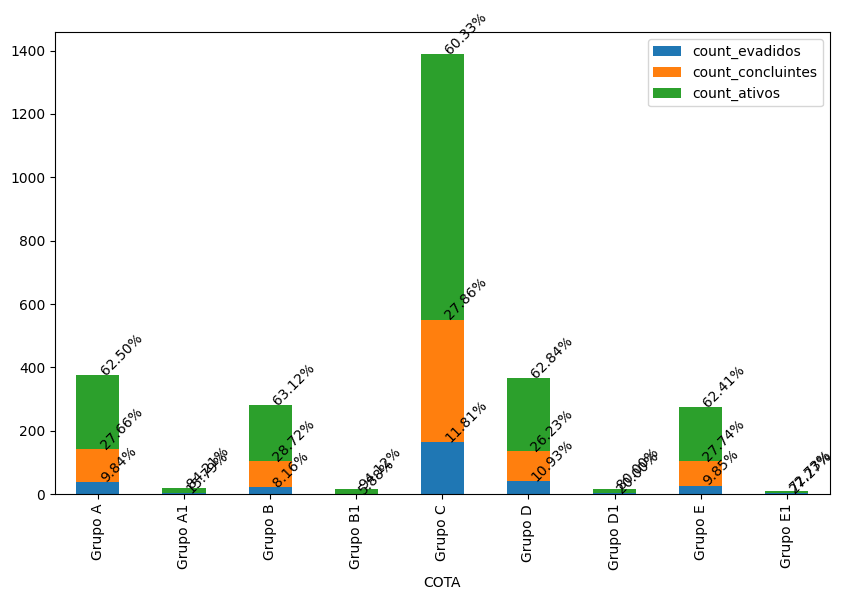

In [21]:
# Para gerar um gráfico que mostra a relação entre ingressantes e evadidos por curso, 
# incluindo qualquer outra coluna do DataFrame df_ingressantes_apos_2012,
# substitua as variáveis abaixo (coluna e curso)

coluna = "COTA"
curso = "MEDICINA"

cota_por_curso(evadido_vs_ingressante_por_filtro(df_ingressantes_apos_2012, coluna), curso)

In [22]:
df_completo

,ANO_INGRESSO,SEMESTRE_INGRESSO,TIPO_INGRESSO,COTA,CURSO_NOME,AREA,SITUACAO,MOTIVO_SAIDA,CAMPUS,TURNO,...,LAT_ORGM,LOCAL_ORGM,BAIXA_RENDA,ESCOLA_PUBLICA,ETNIA_PPI,PCD,ESTADO,Baixa renda,Escola pública,Etnia PPI
0,2008,1,Transferência Obrigatória,NaN,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,...,NaN,NaN,NaN,NaN,NaN,Não,NaN,Não,Não,Não
1,2008,1,VESTIBULAR,Grupo B,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,...,NaN,NaN,Sim,Sim,Não,Não,NaN,Sim,Sim,Não
2,2008,1,PISM,Grupo C,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,Abandono,JUIZ DE FORA,INTEGRAL,...,NaN,NaN,Não,Não,Não,Não,NaN,Não,Não,Não
3,2008,1,VESTIBULAR,Grupo C,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Concluido,Conclusão,JUIZ DE FORA,INTEGRAL,...,NaN,NaN,Não,Não,Não,Não,NaN,Não,Não,Não
4,2008,1,VESTIBULAR,Grupo B,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,...,NaN,NaN,Sim,Sim,Não,Não,NaN,Sim,Sim,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52604,2023,1,SiSU,Grupo A,BACHARELADO EM DESIGN,Lingüística Letras e Artes,Ativo,A Especificar,JUIZ DE FORA,INTEGRAL,...,-20.678101,"CANAA, MG, BRASIL",Sim,Sim,Sim,Não,MG,Sim,Sim,Sim
52605,2023,1,SiSU,Grupo C,BACHARELADO EM DESIGN,Lingüística Letras e Artes,Ativo,A Especificar,JUIZ DE FORA,INTEGRAL,...,-15.601411,"CUIABA, MT, BRASIL",Não,Não,Não,Não,MT,Não,Não,Não
52606,2023,1,SiSU,Grupo C,BACHARELADO EM DESIGN,Lingüística Letras e Artes,Ativo,A Especificar,JUIZ DE FORA,INTEGRAL,...,-22.470962,"RESENDE, RJ, BRASIL",Não,Não,Não,Não,RJ,Não,Não,Não
52607,2023,1,PISM,Grupo B,BACHARELADO EM DESIGN,Lingüística Letras e Artes,Evadido,Desistência,JUIZ DE FORA,INTEGRAL,...,-21.120123,"UBA, MG, BRASIL",Sim,Sim,Não,Não,MG,Sim,Sim,Não


In [23]:
df_completo.SITUACAO.unique()

array(['Evadido', 'Concluido', 'Ativo'], dtype=object)

In [24]:
df_filtrado = df_completo[df_completo['SITUACAO'] != 'Ativo']
df_filtrado

,ANO_INGRESSO,SEMESTRE_INGRESSO,TIPO_INGRESSO,COTA,CURSO_NOME,AREA,SITUACAO,MOTIVO_SAIDA,CAMPUS,TURNO,...,LAT_ORGM,LOCAL_ORGM,BAIXA_RENDA,ESCOLA_PUBLICA,ETNIA_PPI,PCD,ESTADO,Baixa renda,Escola pública,Etnia PPI
0,2008,1,Transferência Obrigatória,NaN,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,...,NaN,NaN,NaN,NaN,NaN,Não,NaN,Não,Não,Não
1,2008,1,VESTIBULAR,Grupo B,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,...,NaN,NaN,Sim,Sim,Não,Não,NaN,Sim,Sim,Não
2,2008,1,PISM,Grupo C,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,Abandono,JUIZ DE FORA,INTEGRAL,...,NaN,NaN,Não,Não,Não,Não,NaN,Não,Não,Não
3,2008,1,VESTIBULAR,Grupo C,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Concluido,Conclusão,JUIZ DE FORA,INTEGRAL,...,NaN,NaN,Não,Não,Não,Não,NaN,Não,Não,Não
4,2008,1,VESTIBULAR,Grupo B,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,...,NaN,NaN,Sim,Sim,Não,Não,NaN,Sim,Sim,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52552,2022,1,SiSU,Grupo C,BACHARELADO EM DESIGN,Lingüística Letras e Artes,Evadido,Desistência,JUIZ DE FORA,INTEGRAL,...,-22.470962,"RESENDE, RJ, BRASIL",Não,Não,Não,Não,RJ,Não,Não,Não
52558,2022,1,PISM,Grupo C,BACHARELADO EM DESIGN,Lingüística Letras e Artes,Evadido,Desistência,JUIZ DE FORA,INTEGRAL,...,-20.754870,"VICOSA, MG, BRASIL",Não,Não,Não,Não,MG,Não,Não,Não
52564,2023,1,SiSU,Grupo C,BACHARELADO EM DESIGN,Lingüística Letras e Artes,Evadido,Desistência,JUIZ DE FORA,INTEGRAL,...,-22.540852,"BARRA MANSA, RJ, BRASIL",Não,Não,Não,Não,RJ,Não,Não,Não
52592,2023,1,PISM,Grupo C,BACHARELADO EM DESIGN,Lingüística Letras e Artes,Evadido,Desistência,JUIZ DE FORA,INTEGRAL,...,-21.773300,"SAO PEDRO, JUIZ DE FORA, MG, BRASIL",Não,Não,Não,Não,MG,Não,Não,Não


In [25]:
df_filtrado.SITUACAO.unique()

array(['Evadido', 'Concluido'], dtype=object)

In [26]:
df_filtrado.SEMESTRE_INGRESSO.unique()

array([1, 2, 3])

In [27]:
from sklearn.preprocessing import OrdinalEncoder

In [28]:
# Vamos converter Situacao em números

# Instantiate the Ordinal Encoder
ordinal_encoder = OrdinalEncoder(categories = [["Concluido","Evadido"]])

# Fit it
ordinal_encoder.fit(df_filtrado[["SITUACAO"]])

# Display the learned categories
display(ordinal_encoder.categories_)

# Transforming categories into ordered numbers
df_filtrado["SITUACAO_encoded"] = ordinal_encoder.transform(df_filtrado[["SITUACAO"]])

# Showing the transformed estudo
df_filtrado

[array(['Concluido', 'Evadido'], dtype=object)]

/var/folders/sm/xmq5cz0s1y35vkd03649jpnr0000gn/T/ipykernel_14634/1740048486.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado["SITUACAO_encoded"] = ordinal_encoder.transform(df_filtrado[["SITUACAO"]])


,ANO_INGRESSO,SEMESTRE_INGRESSO,TIPO_INGRESSO,COTA,CURSO_NOME,AREA,SITUACAO,MOTIVO_SAIDA,CAMPUS,TURNO,...,LOCAL_ORGM,BAIXA_RENDA,ESCOLA_PUBLICA,ETNIA_PPI,PCD,ESTADO,Baixa renda,Escola pública,Etnia PPI,SITUACAO_encoded
0,2008,1,Transferência Obrigatória,NaN,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,...,NaN,NaN,NaN,NaN,Não,NaN,Não,Não,Não,1.0
1,2008,1,VESTIBULAR,Grupo B,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,...,NaN,Sim,Sim,Não,Não,NaN,Sim,Sim,Não,1.0
2,2008,1,PISM,Grupo C,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,Abandono,JUIZ DE FORA,INTEGRAL,...,NaN,Não,Não,Não,Não,NaN,Não,Não,Não,1.0
3,2008,1,VESTIBULAR,Grupo C,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Concluido,Conclusão,JUIZ DE FORA,INTEGRAL,...,NaN,Não,Não,Não,Não,NaN,Não,Não,Não,0.0
4,2008,1,VESTIBULAR,Grupo B,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,...,NaN,Sim,Sim,Não,Não,NaN,Sim,Sim,Não,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52552,2022,1,SiSU,Grupo C,BACHARELADO EM DESIGN,Lingüística Letras e Artes,Evadido,Desistência,JUIZ DE FORA,INTEGRAL,...,"RESENDE, RJ, BRASIL",Não,Não,Não,Não,RJ,Não,Não,Não,1.0
52558,2022,1,PISM,Grupo C,BACHARELADO EM DESIGN,Lingüística Letras e Artes,Evadido,Desistência,JUIZ DE FORA,INTEGRAL,...,"VICOSA, MG, BRASIL",Não,Não,Não,Não,MG,Não,Não,Não,1.0
52564,2023,1,SiSU,Grupo C,BACHARELADO EM DESIGN,Lingüística Letras e Artes,Evadido,Desistência,JUIZ DE FORA,INTEGRAL,...,"BARRA MANSA, RJ, BRASIL",Não,Não,Não,Não,RJ,Não,Não,Não,1.0
52592,2023,1,PISM,Grupo C,BACHARELADO EM DESIGN,Lingüística Letras e Artes,Evadido,Desistência,JUIZ DE FORA,INTEGRAL,...,"SAO PEDRO, JUIZ DE FORA, MG, BRASIL",Não,Não,Não,Não,MG,Não,Não,Não,1.0


In [29]:
df_filtrado.PCD.unique()

array(['Não', 'Sim'], dtype=object)

In [30]:
# Vamos converter Situacao em números

# Instantiate the Ordinal Encoder
ordinal_encoder = OrdinalEncoder(categories = [["Não","Sim"]])

# Fit it
ordinal_encoder.fit(df_filtrado[["PCD"]])

# Display the learned categories
display(ordinal_encoder.categories_)

# Transforming categories into ordered numbers
df_filtrado["PCD_encoded"] = ordinal_encoder.transform(df_filtrado[["PCD"]])

# Showing the transformed estudo
df_filtrado

[array(['Não', 'Sim'], dtype=object)]

/var/folders/sm/xmq5cz0s1y35vkd03649jpnr0000gn/T/ipykernel_14634/1866184167.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado["PCD_encoded"] = ordinal_encoder.transform(df_filtrado[["PCD"]])


,ANO_INGRESSO,SEMESTRE_INGRESSO,TIPO_INGRESSO,COTA,CURSO_NOME,AREA,SITUACAO,MOTIVO_SAIDA,CAMPUS,TURNO,...,BAIXA_RENDA,ESCOLA_PUBLICA,ETNIA_PPI,PCD,ESTADO,Baixa renda,Escola pública,Etnia PPI,SITUACAO_encoded,PCD_encoded
0,2008,1,Transferência Obrigatória,NaN,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,...,NaN,NaN,NaN,Não,NaN,Não,Não,Não,1.0,0.0
1,2008,1,VESTIBULAR,Grupo B,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,...,Sim,Sim,Não,Não,NaN,Sim,Sim,Não,1.0,0.0
2,2008,1,PISM,Grupo C,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,Abandono,JUIZ DE FORA,INTEGRAL,...,Não,Não,Não,Não,NaN,Não,Não,Não,1.0,0.0
3,2008,1,VESTIBULAR,Grupo C,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Concluido,Conclusão,JUIZ DE FORA,INTEGRAL,...,Não,Não,Não,Não,NaN,Não,Não,Não,0.0,0.0
4,2008,1,VESTIBULAR,Grupo B,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,...,Sim,Sim,Não,Não,NaN,Sim,Sim,Não,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52552,2022,1,SiSU,Grupo C,BACHARELADO EM DESIGN,Lingüística Letras e Artes,Evadido,Desistência,JUIZ DE FORA,INTEGRAL,...,Não,Não,Não,Não,RJ,Não,Não,Não,1.0,0.0
52558,2022,1,PISM,Grupo C,BACHARELADO EM DESIGN,Lingüística Letras e Artes,Evadido,Desistência,JUIZ DE FORA,INTEGRAL,...,Não,Não,Não,Não,MG,Não,Não,Não,1.0,0.0
52564,2023,1,SiSU,Grupo C,BACHARELADO EM DESIGN,Lingüística Letras e Artes,Evadido,Desistência,JUIZ DE FORA,INTEGRAL,...,Não,Não,Não,Não,RJ,Não,Não,Não,1.0,0.0
52592,2023,1,PISM,Grupo C,BACHARELADO EM DESIGN,Lingüística Letras e Artes,Evadido,Desistência,JUIZ DE FORA,INTEGRAL,...,Não,Não,Não,Não,MG,Não,Não,Não,1.0,0.0


In [31]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Instanciando o OneHotEncoder
ohe = OneHotEncoder(sparse_output = False) 

# Fit encoder
ohe.fit(df_filtrado[['Baixa renda']]) 

# Display the detected categories
print(f"As categorias detectadas pelo OneHotEncoder são {ohe.categories_}")

As categorias detectadas pelo OneHotEncoder são [array(['Não', 'Sim'], dtype=object)]


In [32]:
# Transformando os dados correntes de escolaridade 
df_filtrado[ohe.get_feature_names_out()] = ohe.transform(df_filtrado[['Baixa renda']])

# Drop the column which has been encoded
# estudo.drop(columns = ["grau_de_instr"], inplace = True)

# Show the dataset
df_filtrado

/var/folders/sm/xmq5cz0s1y35vkd03649jpnr0000gn/T/ipykernel_14634/1246355517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado[ohe.get_feature_names_out()] = ohe.transform(df_filtrado[['Baixa renda']])
/var/folders/sm/xmq5cz0s1y35vkd03649jpnr0000gn/T/ipykernel_14634/1246355517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado[ohe.get_feature_names_out()] = ohe.transform(df_filtrado[['Baixa renda']])


,ANO_INGRESSO,SEMESTRE_INGRESSO,TIPO_INGRESSO,COTA,CURSO_NOME,AREA,SITUACAO,MOTIVO_SAIDA,CAMPUS,TURNO,...,ETNIA_PPI,PCD,ESTADO,Baixa renda,Escola pública,Etnia PPI,SITUACAO_encoded,PCD_encoded,Baixa renda_Não,Baixa renda_Sim
0,2008,1,Transferência Obrigatória,NaN,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,...,NaN,Não,NaN,Não,Não,Não,1.0,0.0,1.0,0.0
1,2008,1,VESTIBULAR,Grupo B,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,...,Não,Não,NaN,Sim,Sim,Não,1.0,0.0,0.0,1.0
2,2008,1,PISM,Grupo C,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,Abandono,JUIZ DE FORA,INTEGRAL,...,Não,Não,NaN,Não,Não,Não,1.0,0.0,1.0,0.0
3,2008,1,VESTIBULAR,Grupo C,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Concluido,Conclusão,JUIZ DE FORA,INTEGRAL,...,Não,Não,NaN,Não,Não,Não,0.0,0.0,1.0,0.0
4,2008,1,VESTIBULAR,Grupo B,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,...,Não,Não,NaN,Sim,Sim,Não,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52552,2022,1,SiSU,Grupo C,BACHARELADO EM DESIGN,Lingüística Letras e Artes,Evadido,Desistência,JUIZ DE FORA,INTEGRAL,...,Não,Não,RJ,Não,Não,Não,1.0,0.0,1.0,0.0
52558,2022,1,PISM,Grupo C,BACHARELADO EM DESIGN,Lingüística Letras e Artes,Evadido,Desistência,JUIZ DE FORA,INTEGRAL,...,Não,Não,MG,Não,Não,Não,1.0,0.0,1.0,0.0
52564,2023,1,SiSU,Grupo C,BACHARELADO EM DESIGN,Lingüística Letras e Artes,Evadido,Desistência,JUIZ DE FORA,INTEGRAL,...,Não,Não,RJ,Não,Não,Não,1.0,0.0,1.0,0.0
52592,2023,1,PISM,Grupo C,BACHARELADO EM DESIGN,Lingüística Letras e Artes,Evadido,Desistência,JUIZ DE FORA,INTEGRAL,...,Não,Não,MG,Não,Não,Não,1.0,0.0,1.0,0.0


In [33]:
colunas_selecionadas = ['SITUACAO_encoded', 'Baixa_renda_Sim', 'PCD_encoded', 'Escola_pública_encoded']
df_var_numeric = df_filtrado[colunas_selecionadas]

KeyError: "['Baixa_renda_Sim', 'Escola_pública_encoded'] not in index"

é importante observar que as medidas de correlação tradicionais, como a correlação de Pearson, não são apropriadas para variáveis binárias, pois essas medidas pressupõem que as variáveis são contínuas e normalmente distribuídas.

In [34]:
df_var_numeric.corr()

NameError: name 'df_var_numeric' is not defined

Em vez disso, para calcular a correlação entre variáveis binárias, você pode usar medidas específicas para esse tipo de variável. Duas medidas comuns são a Correlação de Matthews (coeficiente de Matthews) e o Coeficiente de Tschuprow.Se ambas as variáveis são binárias, a correlação de Matthews é uma escolha adequada

In [35]:
import pandas as pd
from sklearn.metrics import matthews_corrcoef
from scipy.stats import pointbiserialr

# Calculando a correlação de Matthews
matthews_corr = matthews_corrcoef(df_filtrado['SITUACAO_encoded'], df_filtrado['Baixa_renda_Sim'])
print(f'Correlação de Matthews: {matthews_corr}')



KeyError: 'Baixa_renda_Sim'

In [ ]:
# Calculando a correlação de Matthews
matthews_corr = matthews_corrcoef(df_filtrado['SITUACAO_encoded'], df_filtrado['PCD_encoded'])
print(f'Correlação de Matthews: {matthews_corr}')

In [ ]:
df_filtrado.rename(columns={'Baixa renda_Sim': 'Baixa_renda_Sim'}, inplace=True)


In [ ]:
import statsmodels.formula.api as smf
 
model2 = smf.logit(formula="SITUACAO_encoded ~ Baixa_renda_Sim", data=df_filtrado).fit()
model2.params

In [ ]:
Baixa_renda_Sim = 1
ln_odd  = model2.params[0] + model2.params[1] * Baixa_renda_Sim
odd     = np.exp(ln_odd)
prob    = odd / (1 + odd)

print(f"Ln Odd de realizar evasão sendo de baixa renda:\t\t\t {ln_odd:.2f}")
print(f"Odds de realizar evasão sendo de baixa renda:\t\t {odd:.2f}")
print(f"Probability da evasão ser feita por alguem de baixa renda:\t {prob}")

In [ ]:
model2.summary()

In [ ]:
# Vamos converter Situacao em números

# Instantiate the Ordinal Encoder
ordinal_encoder = OrdinalEncoder(categories = [["Não","Sim"]])

# Fit it
ordinal_encoder.fit(df_filtrado[["Escola pública"]])

# Display the learned categories
display(ordinal_encoder.categories_)

# Transforming categories into ordered numbers
df_filtrado["Escola_pública_encoded"] = ordinal_encoder.transform(df_filtrado[["Escola pública"]])

# Showing the transformed estudo
df_filtrado

In [ ]:
df_filtrado

In [38]:
df_filtrado.columns

Index(['ANO_INGRESSO', 'SEMESTRE_INGRESSO', 'TIPO_INGRESSO', 'COTA',
       'CURSO_NOME', 'AREA', 'SITUACAO', 'MOTIVO_SAIDA', 'CAMPUS', 'TURNO',
       'ETNIA', 'SEXO', 'TIPOCURSO', 'LNG', 'LAT', 'LOCAL', 'LNG_ORGM',
       'LAT_ORGM', 'LOCAL_ORGM', 'BAIXA_RENDA', 'ESCOLA_PUBLICA', 'ETNIA_PPI',
       'PCD', 'ESTADO', 'Baixa renda', 'Escola pública', 'Etnia PPI',
       'SITUACAO_encoded', 'PCD_encoded', 'Baixa renda_Não',
       'Baixa renda_Sim'],
      dtype='object')

In [36]:
import statsmodels.formula.api as smf

In [45]:
model3 = smf.logit(formula='SITUACAO_encoded ~ SEXO', data=df_filtrado).fit()
model3.params

Optimization terminated successfully.
         Current function value: 0.682556
         Iterations 4


Intercept   -0.382329
SEXO[T.M]    0.500996
dtype: float64

In [46]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       SITUACAO_encoded   No. Observations:                35292
Model:                          Logit   Df Residuals:                    35290
Method:                           MLE   Df Model:                            1
Date:                Mon, 30 Oct 2023   Pseudo R-squ.:                 0.01114
Time:                        14:19:49   Log-Likelihood:                -24089.
converged:                       True   LL-Null:                       -24360.
Covariance Type:            nonrobust   LLR p-value:                4.985e-120
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3823      0.015    -26.054      0.000      -0.411      -0.354
SEXO[T.M]      0.5010      0.022     23.214      0.000       0.459       0.543
==============================================================================
"""

In [47]:
import matplotlib.pyplot as plt

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (5,) and arg 3 with shape (31,).

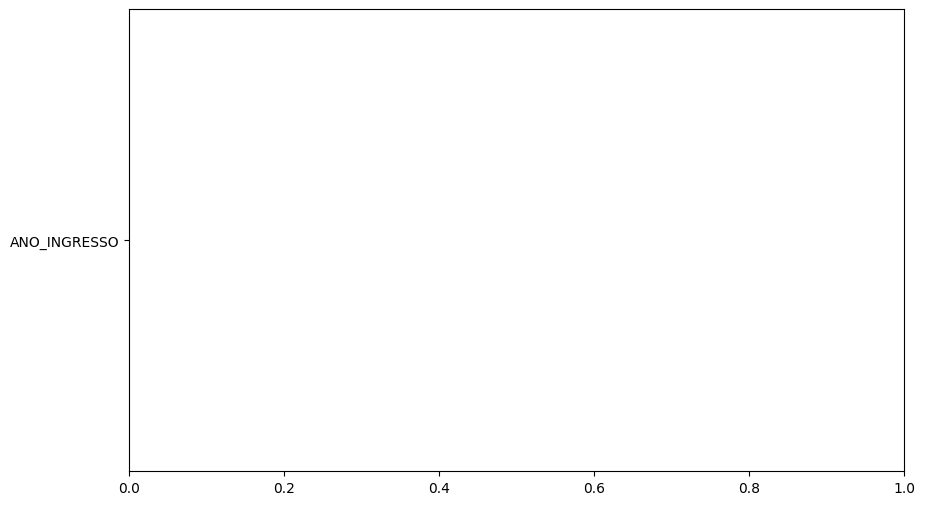

In [44]:
coeficientes = model3.params
#Criar o Gráfico de Efeitos:
#Agora que você tem os coeficientes, pode criar o gráfico de efeitos. Vou mostrar um exemplo básico usando a biblioteca matplotlib para criar um gráfico de barras dos efeitos das variáveis independentes.



# Extrair os nomes das variáveis independentes do DataFrame original (X)
nomes_variaveis = list(df_filtrado.columns)

# Criar um gráfico de barras dos coeficientes
plt.figure(figsize=(10, 6))
plt.barh(nomes_variaveis, coeficientes)
plt.xlabel('Efeito na Probabilidade (log-odds)')
plt.ylabel('Variáveis Independentes')
plt.title('Gráfico de Efeitos da Regressão Logística')
plt.show()